In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install mysql-connector-python

In [6]:
pip install --upgrade pip

In [8]:
pip install matplotlib

In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),  # Added payments.csv for specific handling
    ('order_items.csv', 'order_items')
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = r'E:\1.JOB&Learning_ALL_DOCS\3.DataAnalytics\Projects\Ecommerce' #path to our folder file

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

# Basic Queries
1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state. 

In [1]:
import pandas as pd
import matplotlib.pyplot as py
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
          host = 'localhost'
        , username = 'root'
        , password = 'Root'
        , database = 'ecommerce'
    )

cur = db.cursor()

    

# List all unique cities where customers are located

In [1]:
#Note: For heading use Markdown, place # at beginning, and at end shift+Enter

In [3]:
query = """ SELECT DISTINCT customer_city FROM ecommerce.customers """
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017

In [ ]:
query = """ 
           SELECT COUNT(order_id) FROM ecommerce.orders 
            WHERE YEAR(order_purchase_timestamp) = 2017
        """
cur.execute(query)
data = cur.fetchall()

#data

"Total orders placed in 2017 are", data[0][0]

# Find the total sales per category

In [11]:
query = """
       SELECT prod.product_category, Sum(pay.payment_value) from ecommerce.payments pay
       left join ecommerce.order_items ord ON pay.order_id = ord.order_id
       left join ecommerce.products prod ON prod.product_id = ord.product_id
       GROUP BY prod.product_category
       ORDER BY prod.product_category
        """
cur.execute(query)
data = cur.fetchall()
data

[(None, 415393.6603031829),
 ('Agro Industria e Comercio', 118730.61054205894),
 ('Art', 30992.930108070374),
 ('Arts and Crafts', 2326.1699829101562),
 ('audio', 60324.62010639906),
 ('automotive', 852294.3311252594),
 ('babies', 539845.659735024),
 ('Bags Accessories', 187151.29038503766),
 ('bed table bath', 1712553.671003269),
 ('Blu Ray DVDs', 7935.279939889908),
 ('Casa Construcao', 136645.29030653834),
 ('cds music dvds', 1199.4300155639648),
 ('Christmas articles', 18994.76999425888),
 ('cine photo', 9530.319977998734),
 ('CITTE AND UPHACK FURNITURE', 5998.540077209473),
 ('climatization', 91170.65948677063),
 ('computer accessories', 1585330.4462582897),
 ('CONSTRUCTION SECURITY TOOLS', 65691.02970695496),
 ('Construction Tools Construction', 241475.6302587986),
 ('Construction Tools Garden', 42394.41011977196),
 ('Construction Tools Illumination', 72712.47991323471),
 ('Construction Tools Tools', 21069.070079803467),
 ('Cool Stuff', 779698.0000486821),
 ('Drink foods', 27289.

In [17]:
query = """
       SELECT Upper(products.product_category) category, round(Sum(payments.payment_value), 2) sales 
        from ecommerce.products
        join ecommerce.order_items ON order_items.product_id = products.product_id
        join ecommerce.payments ON payments.order_id = order_items.order_id
       GROUP BY category
       ORDER BY category
        """
cur.execute(query)
data = cur.fetchall()
data

#create a dataFrame
df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,None,252801.71
1,AGRO INDUSTRIA E COMERCIO,118730.61
2,ART,30992.93
3,ARTS AND CRAFTS,2326.17
4,AUDIO,60324.62
...,...,...
69,STATIONARY STORE,317440.07
70,TECHNICAL BOOKS,24915.44
71,TELEPHONY,486882.05
72,TOYS,619037.69


# Calculate the percentage of orders that were paid in installments

In [28]:
query  = """
           SELECT SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END)/COUNT(*)*100
               from ecommerce.payments
        """
cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the persentage of oredrs that were paid in installmentsis',
 Decimal('99.9981'))

# Count the number of customers from each state

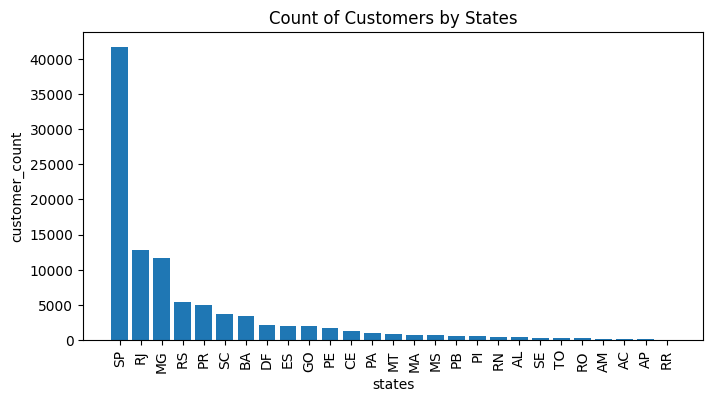

In [27]:
import matplotlib.pyplot as plt
query = """ SELECT COUNT(customer_unique_id) ,customer_state 
                FROM customers
                group by customer_state
        """
cur.execute(query)
data = cur.fetchall()

df= pd.DataFrame(data, columns= ["customer_count", "state"])
df=df.sort_values(by = "customer_count", ascending=False)

plt.figure(figsize = (8,4))  
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)

plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by States")

plt.show()

# Intermediate Queries
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by revenue.

# 1. Calculate the number of orders per month in 2018

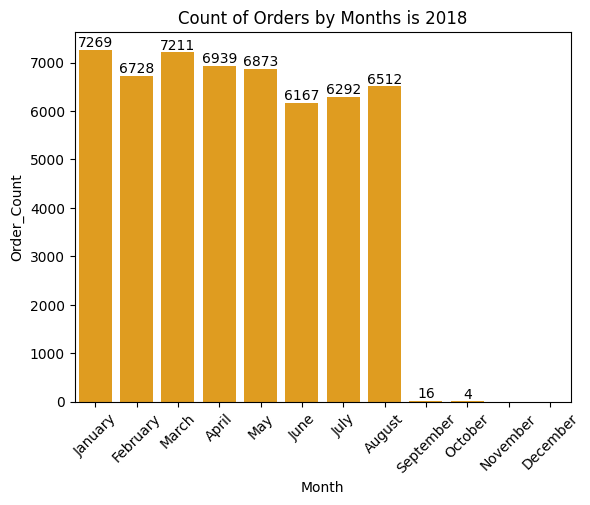

In [33]:
import matplotlib.pyplot as plt #and used seaborn
query = """
        SELECT MONTHNAME(order_purchase_timestamp), Count(order_id) from  ecommerce.orders
        WHERE YEAR(order_purchase_timestamp) = 2018
        Group By MONTH(order_purchase_timestamp)
        """
cur.execute(query)
data = cur.fetchall()
#data
#convert into DataFrame
df = pd.DataFrame(data, columns = ["Month", "Order_Count"])
#df
#Creating Bar Plot
#plt.bar(df["Month"], df["Order_Count"])
o = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
#ax = sns.barplot(x = df["Month"], y = df["Order_Count"], data = df, order = o, hue = df["Month"], palette = "viridis")
ax = sns.barplot(x = df["Month"], y = df["Order_Count"], data = df, order = o, color = "Orange")

plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])

plt.title("Count of Orders by Months is 2018")

plt.show()

# 2. Find the average number of products per order, grouped by customer city.

In [17]:
query = """
        with count_per_order as (
                SELECT oi.order_id, o.customer_id,  COUNT(oi.order_item_id) oc
                    from ecommerce.order_items oi
                    JOIN ecommerce.orders o ON o.order_id = oi.order_id
                    Group BY oi.order_id, o.customer_id
        )
        SELECT customers.customer_city, AVG(count_per_order.oc)
            from customers 
            join count_per_order on customers.customer_id = count_per_order.customer_id
            Group by customers.customer_city
            Order by AVG(count_per_order.oc) DESC
        """
cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer_City", "Avg Count per order"])
df

,Customer_City,Avg Count per order
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,candido godoi,6.0000
3,datas,6.0000
4,matias olimpio,5.0000
...,...,...
4105,sebastiao leal,1.0000
4106,morro agudo de goias,1.0000
4107,santa filomena,1.0000
4108,guamiranga,1.0000


# 3. Calculate the percentage of total revenue contributed by each product category.

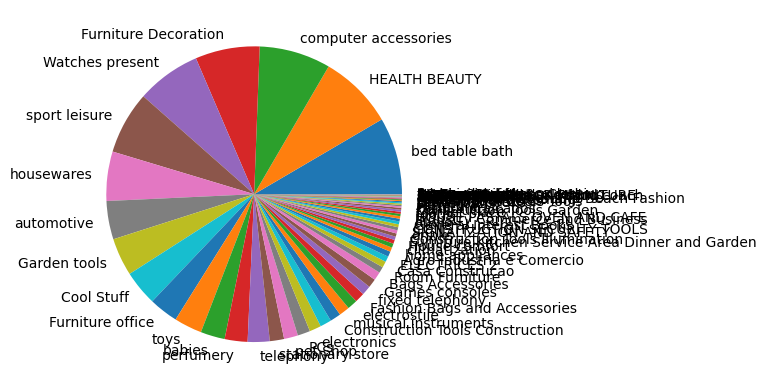

In [20]:
import matplotlib.pyplot as plt
query = """
            SELECT products.product_category, round(((SUM(payments.payment_value))/(select sum(payment_value) from payments)*100),2) as sales_percentage
                from products
            join order_items on order_items.product_id = products.product_id
            join payments on payments.order_id = order_items.order_id
            Group by products.product_category
            ORDER by sales_percentage DESC
        """
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Category", "Percentage Distribution"])
df.head()

plt.pie(df["Percentage Distribution"], labels = df["Category"])
plt.show() --100% data show avoid using this chart.


# Identify the correlation between product price and the number of times a product has been purchased.

# what is the product price & payment


In [ ]:
import matplotlib.pyplot as plt
query = """
        SELECT products.product_category, order_items.price, payments.payment_value, round(( payments.payment_value -order_items.price ), 2) as ExtraAmount
            from ecommerce.payments
        JOIN ecommerce.order_items ON order_items.order_id = payments.order_id 
        JOIN ecommerce.products ON products.product_id = order_items.product_id
        """

cur.execute(query)
data = cur.fetchall()
# data
df = pd.DataFrame(data, columns = ["Product_Category", "Price", "Payment_Value", "Extra_Amount"])
#df
plt.pie(df["Price"], labels = df["Product_Category"])
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

query = """
    SELECT 
        p.product_category AS category,
        oi.price,
        pay.payment_value,
        ROUND(pay.payment_value - oi.price, 2) AS extra_amount
    FROM ecommerce.payments AS pay
    JOIN ecommerce.order_items AS oi ON oi.order_id = pay.order_id 
    JOIN ecommerce.products AS p ON p.product_id = oi.product_id
"""

cur.execute(query)
df = pd.DataFrame(cur.fetchall(), columns=["Product_Category", "Price", "Payment_Value", "Extra_Amount"])

# Plot pie chart for price distribution by category
plt.figure(figsize=(8, 8))
plt.pie(
    df["Price"], 
    labels=df["Product_Category"], 
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Price Distribution by Product Category")
plt.tight_layout()
plt.show()


KeyboardInterrupt



Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000014992A2E440> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 